<a href="https://colab.research.google.com/github/parto1000/diabetes-iridology/blob/master/cifar10_aug_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers

In [19]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [20]:
train_images.shape

(50000, 32, 32, 3)

In [21]:
train_images =  train_images.astype('float32')/ 255
test_images =  test_images.astype('float32')/ 255
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)



In [22]:
train_images = train_images[0:10]
test_images = test_images[0:10]
train_labels = train_labels[0:10]
test_labels = test_labels[0:10]

In [23]:
train_images = train_images.reshape(-1, 32, 32, 3)
test_images = test_images.reshape(-1, 32, 32, 3)


In [24]:
datagen = ImageDataGenerator(rotation_range=45)

In [25]:
aug = datagen.flow(train_images, train_labels, batch_size= 10)

In [26]:
batch_0 = aug[0]
batch_0_images = aug[0][0]
batch_0_labels = aug[0][1]

In [ ]:
batch_0 = aug[0]
batch_0_images = aug[0][0]
batch_0_labels = aug[0][1]

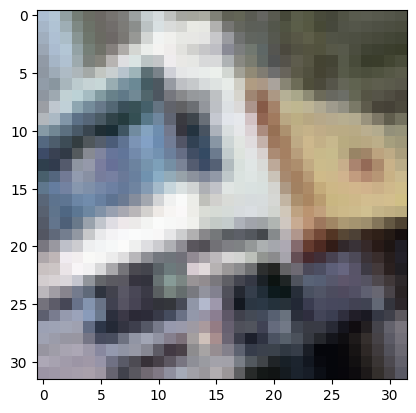

In [27]:
plt.imshow(aug[0][0][0], cmap='gray')

In [28]:
aug[0][1][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

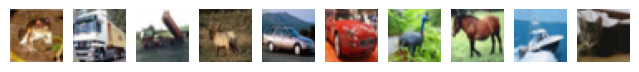

In [29]:
rows = 1
columns = 10

fig = plt.figure(figsize=(8, 8))
for i in range(1, 11):
  img = train_images[i-1]
  fig.add_subplot(rows, columns, i)
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show()

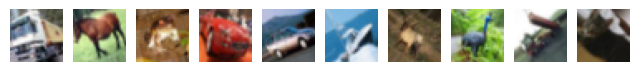

In [30]:
rows = 1
columns = 10

fig = plt.figure(figsize=(8, 8))
for i in range(1, 11):
  img = aug[0][0][i-1]
  fig.add_subplot(rows, columns, i)
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show()

In [31]:
concatenated_train_images = np.concatenate((train_images, aug[0][0]), axis=0)
concatenated_train_lbl = np.concatenate((train_labels, aug[0][1]), axis=0)


In [32]:
concatenated_train_images.shape

(20, 32, 32, 3)

In [33]:
concatenated_train_lbl.shape

(20, 10)

In [34]:
from keras.models import Sequential
from keras import layers

In [37]:
model = Sequential()

#CNN
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,  kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#Classification
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = model.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=1 , epochs=30, batch_size=64)


Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.2067 - accuracy: 1.0000 - val_loss: 1.7610 - val_accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 92ms/step - loss: 0.1677 - accuracy: 0.9444 - val_loss: 1.6230 - val_accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 104ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 1.5651 - val_accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 104ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 1.5138 - val_accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 107ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 1.4402 - val_accuracy: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 103ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 1.3924 - val_accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 99ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.3814 - val_accuracy: 0.5000
Epoch 8/30
1/1 [=========

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.save('/content/drive/MyDrive/mnist_model/mnist_test_model.h5')

# New Section

In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/mnist_model/mnist_test_model.h5')

In [ ]:
import cv2
im_gray_2 = cv2.imread('/content/drive/MyDrive/Test_MNIST/seven.png', cv2.IMREAD_GRAYSCALE)
im_gray_inverted= cv2.bitwise_not(im_gray_2)
im_gray_resized = cv2.resize(im_gray_inverted, (28, 28))
im_gray_flatten = im_gray_resized.reshape(1, 28, 28, 1)
im_gray_normalized = im_gray_flatten.astype('float32')/255
preds = loaded_model.predict(im_gray_normalized)
predicted_label = np.argmax(preds)
print(predicted_label)

In [ ]:
loaded_model.summary()

In [ ]:
for layer in loaded_model.layers:
  print(layer)

In [ ]:
feature_extractor =  keras.models.Model(inputs=loaded_model.input, outputs=loaded_model.layers[-3].output)

In [ ]:
feature_extractor.summary()

In [ ]:
model1 = Sequential()
model1.add(feature_extractor)
model1.add(layers.Conv2D(528, (1, 1), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(10, activation='softmax'))

In [ ]:
model1.summary()

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = model1.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=2 , epochs=5, batch_size=1)


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, show_shapes=True)

In [ ]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = loaded_model.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=1 , epochs=5, batch_size=32)


In [ ]:
loaded_model.summary()

In [ ]:
for layer in feature_extractor.layers:
  layer.trainable=False


#feature_extractor.trainable=False

In [ ]:
feature_extractor.summary()

In [ ]:
model2 = Sequential()
model2.add(feature_extractor)
model2.add(layers.Conv2D(528, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.summary()

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
hist = model2.fit(concatenated_train_images, concatenated_train_lbl,validation_split=0.1, verbose=2 , epochs=5, batch_size=1)


In [ ]:
pretrained_model_include_top_false = tf.keras.applications.ResNet50(include_top=False, input_shape=(32, 32, 3), weights='imagenet')

for layer in pretrained_model_include_top_false.layers:
  layer.trainable = False


In [ ]:
pretrained_model_include_top_true = tf.keras.applications.ResNet50(include_top=True, input_shape=(224, 224, 3), weights='resnet')


In [ ]:
resnet_model = Sequential()
resnet_model.add(pretrained_model_include_top_false)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
pretrained_model_include_top_false.summary()

In [ ]:
pretrained_model_include_top_true.summary()